# DATA 602 Final Project - Energy Price Predictions

Initial Draft: Connor Trask

In [1]:
#Import necessary modules

from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd

In [11]:
#Get last 24 hours of price data from ComEd in 5 minute increments
#price_json = requests.get("https://hourlypricing.comed.com/api?type=5minutefeed")
#Get all price data from ComEd for 2023 in 5 minute increments (up to October 1st)
#Datetime format is YYYYMMDDhhmm
price_json = requests.get("https://hourlypricing.comed.com/api?type=5minutefeed&datestart=202301010100&dateend=202310012359")
price_df = pd.read_json(price_json.text)
#time is in millis UTC, price is cents/kWh
price_df.columns = ["time", "price"]
price_df.head()

,time,price
0,1696222500000,1.2
1,1696222200000,1.1
2,1696221900000,0.9
3,1696221600000,1.0
4,1696221300000,1.8


<Axes: xlabel='time', ylabel='price'>

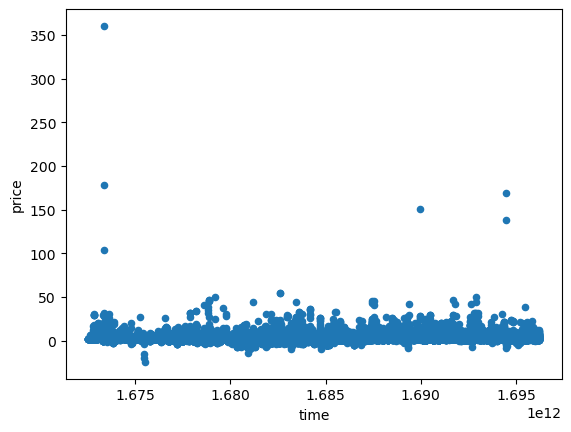

In [12]:
#Exploratory visualization
price_df.plot.scatter("time","price")

<Axes: >

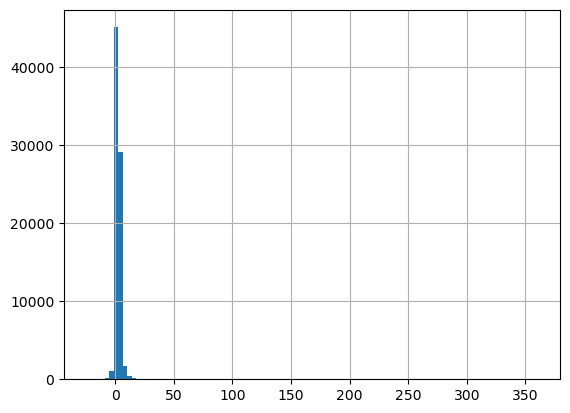

In [15]:
price_df["price"].hist(bins=100)

An exploratory analysis of the price data for 2023 reveals the presence of significant outliers, which make it difficult to observe any patterns in the data. A frequency analysis of the price data reveals that the vast majority of the data is between -10 and 20 cents per kilowatt-hour, so as a result we mask our data to remove any points outside of this range and repeat our visualizations.

<Axes: xlabel='time', ylabel='price'>

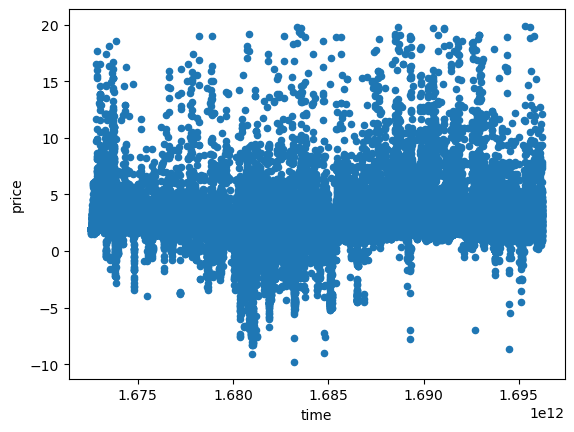

In [18]:
price_df = price_df[(price_df["price"] < 20) & (price_df["price"] > -10)]
price_df.plot.scatter("time","price")

2.591457066844885


<Axes: >

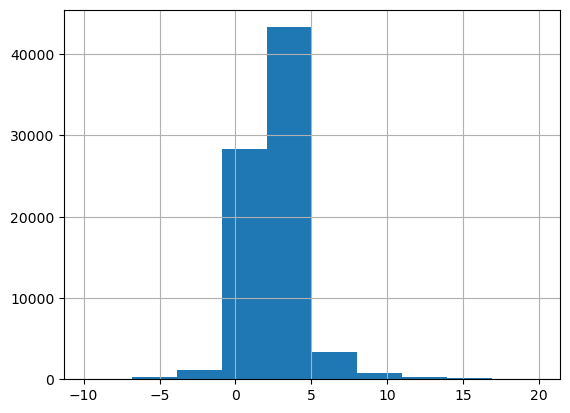

In [20]:
print(np.mean(price_df["price"]))
price_df["price"].hist()

With this filtered data, we can observe that the data is roughly normally distributed, with a mean of ~2.5 cents/kWh. On the timescale of a year, there is no apparent trend to the data, as price appears to be uniformly distributed over the year. The hope is that patterns will become more present as we reduce our timescale and add additional environmental data, converting our noisy price data into useful predictive data.